In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Load the dataset
df = pd.read_csv('/content/Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Overall Engagement Rate

We are going to analyze it to understand how different customers behave and react to different marketing strategies.

In [4]:
# The Response field contains information about whether a customer responded to the marketing efforts.
# Get/Find out the total number of customers who have responded

df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

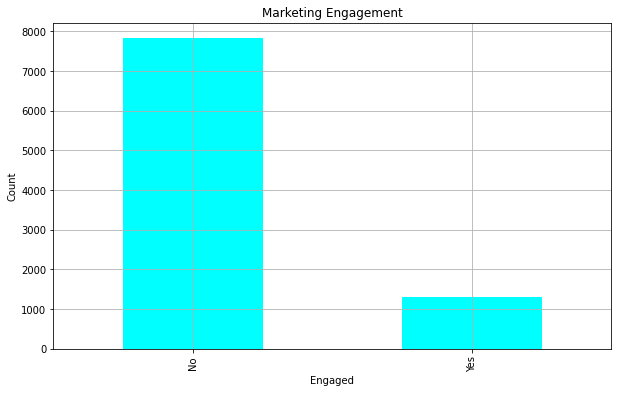

In [5]:
# Visualiza the same using a bar plot

ax = df.groupby('Response').count()['Customer'].plot(
kind='bar', 
color = 'aqua',
grid=True,
figsize=(10,6),
title='Marketing Engagement')

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [6]:
# Calculate the percentages of the engaged and non-engaged customers
df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

From this output and from the plot, we can see that only about 14% of the customers responded to the marketing calls

# Engagement Rates by Offer Type

The Renew Offer Type column in this DataFrame contains the type of the renewal offer presented to the customers. 
We are going to look into what types of offers worked best for the engaged customers.

In [7]:
df.groupby('Renew Offer Type').count()['Customer']

Renew Offer Type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Customer, dtype: int64

In [8]:
## Get the engagement rates per renewal offer type

by_offer_type_df = df.loc[
    df['Response'] == 'Yes' # Counting only agreed/engaged customers
].groupby([ 
    'Renew Offer Type' # engaged customers grouped by renewal offer type
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']


by_offer_type_df


Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

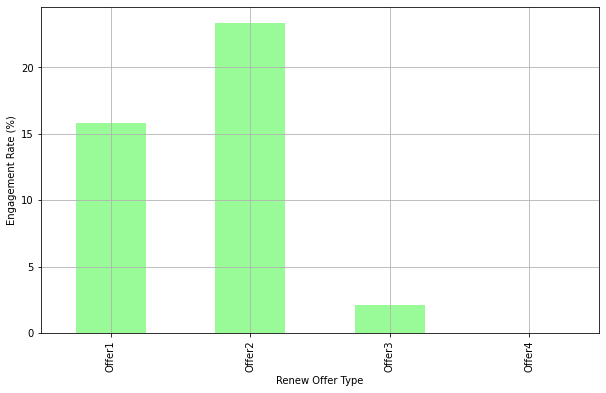

In [9]:
# Visualize this distribution
ax = (by_offer_type_df*100.0).plot(
kind = 'bar',
figsize = (10,6),
grid = True,
color = 'palegreen',
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

This shows the Offer2 is the best Offer

# Offer Type & Vehicle Class

We are going to understand how customers with different attributes respond differently to different marketing messages. We start looking at the engagements rates by each offer type and vehicle class

In [10]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes' # engaged Customers
].groupby(['Renew Offer Type', 'Vehicle Class' ## grouping the data by these two columns
          ]).count()['Customer']/df.groupby(['Renew Offer Type']).count()['Customer']

by_offer_type_df

# Note: Divided by df.groupby(['Renew Offer Type']).count()['Customer'] --> Is for percentage calculation

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [11]:
# Make the previous output more readable using unstack function
# to pivot the data and extract and transform the inner-level groups to columns

by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


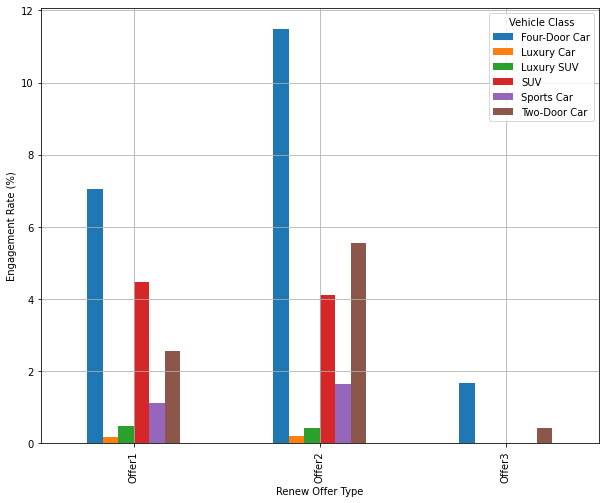

In [12]:
# Visualize this data in bar plot
ax = (by_offer_type_df*100.0).plot(
kind='bar',
figsize=(10, 8),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

We already knew from the previous section “Engagement Rates by Offer Type” that Offer2 had the highest response rate among customers. Now we can add more insights by having broken down the customer attributes with the category “Vehicle class”: 

we can notice that customers with Four-Door Car respond more frequently for all offer types and that those with “Luxury SUV” respond with a higher chance to Offer1 than to Offer2. If we have significantly difference in the response rates among different customer rates, we can fine-tune who to target for different set of offers.

# Engagement Rates by Sales Channel

In [13]:
# We are going to analyze how engagement rates differ by different sales channels.
by_sales_channel_df = df.loc[
df['Response'] == 'Yes'
].groupby([
'Sales Channel'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

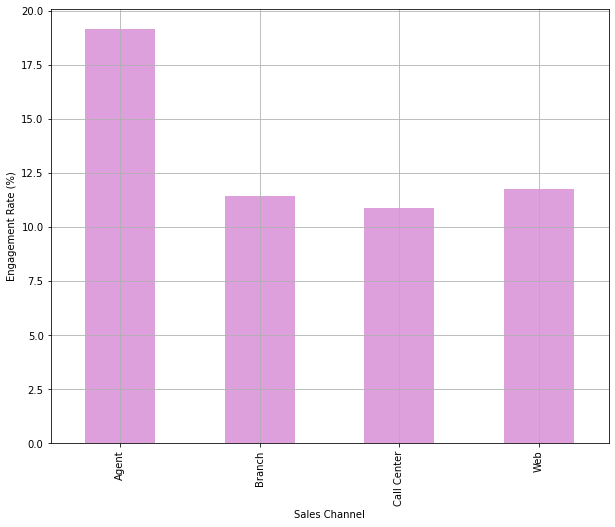

In [14]:
# Visualize this with a bar chart
ax = (by_sales_channel_df*100.0).plot(
kind='bar',
figsize=(10, 8),
color='plum',
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

As we can notice, Agent works better in term of getting responses from the customers, and then sales through Web works the second best. 

# Sales Channel & Vehicle Size

We are going to see whether customers with various vehicle sizes respond differently to different sales channels.

In [15]:
by_sales_channel_df = df.loc[
df['Response'] == 'Yes'
].groupby([
'Sales Channel', 'Vehicle Size'
]).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [16]:
# Unstack the data into a more visible format
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


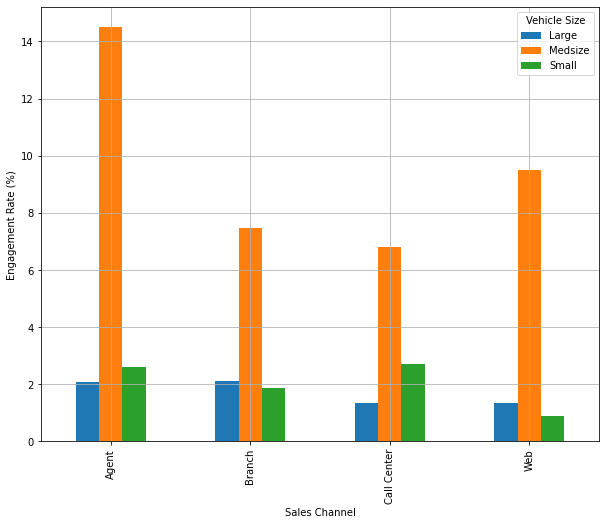

In [17]:
# Visualize this with bar plot
ax = (by_sales_channel_df*100.0).plot(
kind='bar',
figsize=(10, 8),
grid=True,)

ax.set_ylabel('Engagement Rate (%)')
plt.show()

# Engagement Rates by Months Since Policy Inception

In [18]:
by_months_since_inception_df = df.loc[
df['Response'] == 'Yes'
].groupby(by='Months Since Policy Inception'
)['Response'].count() / df.groupby(
by='Months Since Policy Inception'
)['Response'].count() * 100.0


by_months_since_inception_df.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
        ...    
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.692308
Name: Response, Length: 100, dtype: float64

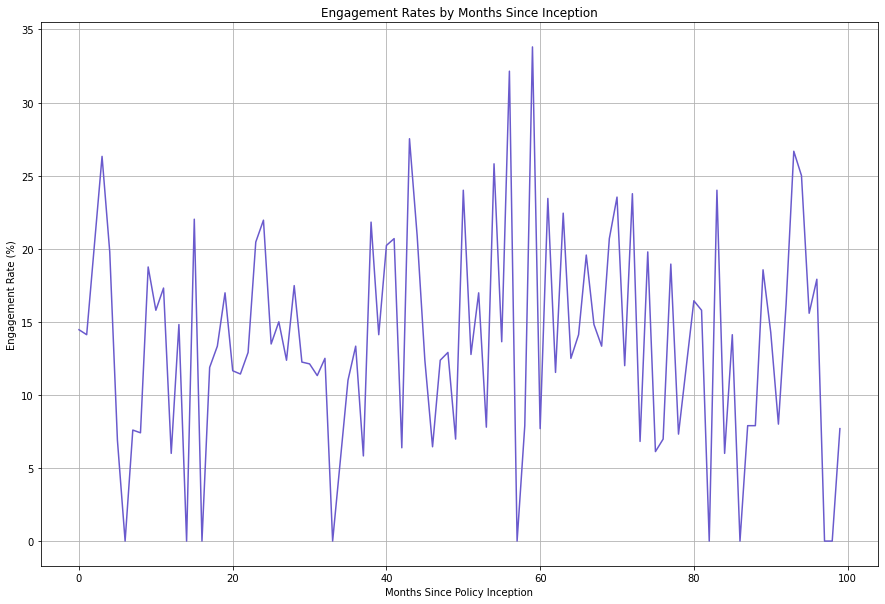

In [19]:
# Visualize this using a plot
ax = by_months_since_inception_df.fillna(0).plot(
figsize=(15, 10),
title='Engagement Rates by Months Since Inception',
grid=True,
color='slateblue'
)
ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')
plt.show()

# Customer Segmentation by CLV & Months Since Policy Inception

In [20]:
## Take a look at the distribution of the CLV
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

For the previous output, we are going to define those customers with a CLV higher than the median as high-CLV customers, and those with a CLV lower than the median as low-CLV customers.

In [21]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low') 

In [22]:
# Do the same procedure for Months Since Policy Inception
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [23]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low')

In [24]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


Visualize  segmentation

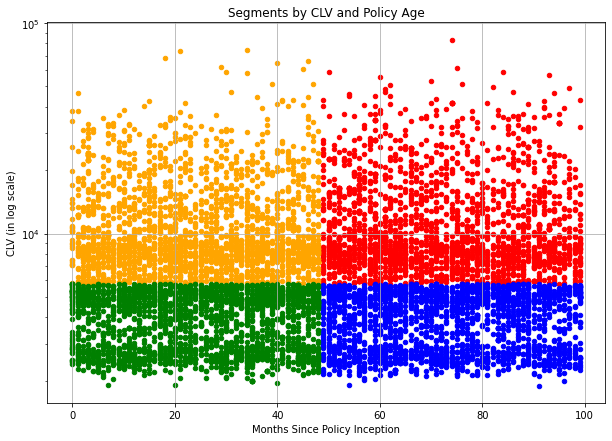

In [25]:
ax = df.loc[
(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='red'
)
df.loc[
(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='blue'
)
df.loc[
(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='orange'
)
df.loc[
(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='green',
grid=True,
figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')

plt.show()